# Topics of Sociability and Solidarity in Recollections of *All* Survivors of Auschwitz-Birkenau

### Research Questions:

- If one watches testimonies of Birkenau survivors for long, what is the probability that she hears survivors speaking about solidarity and sociability? Are they frequent and recurrent elements of survivors' recollections? Or are they rare topics and survivors rather focus their attention on other topics?
- Compared to the probability of other rare or frequent events in Birkenau, are topics related to solidarity and sociability more or less probable in the narration of survivors?

## Load the relevant data

Load the libraries needed to work with the data

In [8]:
import constants
import pandas as pd
import os
from IPython.display import display
%config Completer.use_jedi = False
import networkx as nx
import pyemma

In [9]:
def measure_centrality(pm_model,state_index,centrality_measure_type):
    P = pm_model.P
    gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
    if centrality_measure_type == "degree":
        centrality = nx.degree_centrality(gP)
    elif (centrality_measure_type=="closeness"):
        centrality = nx.closeness_centrality(gP)
    return centrality


Set up the paths to data

In [10]:
input_directory = constants.output_data_markov_modelling

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

Load the stationary probability of different topics in the recollections of survivors

In [11]:
p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')
pm_model = pyemma.load(input_directory+'/'+'complete'+'/'+'pyemma_model','simple')
state_index = pd.read_csv(input_directory+'/'+'complete'+'/'+'state_index.csv')

Use the line below for normalization

In [12]:
p_complete['stationary_prob_normalized'] = p_complete[p_complete.topic_name=='selections']['stationary_prob'].values[0] / p_complete['stationary_prob']

In [13]:
p_complete['stationary_prob_normalized_to_escape'] =  p_complete['stationary_prob']/p_complete[p_complete.topic_name=='escapes']['stationary_prob'].values[0]

In [14]:
p_complete['stationary_prob_normalized_to_escape'].describe()

count    101.000000
mean       2.736804
std        4.384368
min        0.019167
25%        0.211443
50%        0.854368
75%        3.147265
max       26.369532
Name: stationary_prob_normalized_to_escape, dtype: float64

In [15]:
p_complete['stationary_prob_normalized'].describe()

count    101.000000
mean      94.356070
std      177.237740
min        0.635317
25%        5.323037
50%       19.608647
75%       79.231682
max      874.048257
Name: stationary_prob_normalized, dtype: float64

Show the 25 most significant topics

In [16]:
cent = measure_centrality(pm_model,state_index,'closeness')
state_index['centrality'] = list(cent.values())
state_index

,Unnamed: 0,KeywordLabel,centrality
0,0,Appell,0.840336
1,1,German concentration camps,0.709220
2,2,Holocaust faith issues,0.719424
3,3,International Red Cross,0.595238
4,4,Jewish identity,0.598802
...,...,...,...
96,96,transportation,0.833333
97,97,trials,0.555556
98,98,twins,0.694444
99,99,violence,0.877193


In [17]:
state_index.sort_values('centrality',ascending=False)[0:19]


,Unnamed: 0,KeywordLabel,centrality
58,58,living conditions,0.943396
18,18,camp population,0.925926
68,68,perpetrators,0.925926
45,45,forced labor,0.917431
7,7,aid giving,0.917431
95,95,transfer,0.909091
6,6,adaptation methods,0.909091
85,85,selections,0.909091
39,39,family,0.900901
61,61,mass murder,0.892857


In [18]:
display(p_complete[0:25])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
0,0,living conditions,0.095398,0.635317,26.369532
1,1,camp procedures,0.064467,0.940142,17.819664
2,2,selections,0.060608,1.000000,16.753008
3,3,food and thirst,0.046188,1.312183,12.767278
4,4,forced labor,0.044395,1.365203,12.271444
5,5,mass murder,0.041059,1.476127,11.349296
6,6,perpetrators,0.036287,1.670216,10.030446
7,7,camp population,0.035419,1.711141,9.790550
8,8,kapos,0.033639,1.801728,9.298301
9,9,family,0.033135,1.829114,9.159083


## Identify relevant topics

### Identify the facto significant and everyday events

Identify "selection"

In [19]:
selection = p_complete[p_complete.topic_name=='selections']['stationary_prob'].values[0]

Identify "Appell"

In [20]:
Appell = p_complete[p_complete.topic_name=='Appell']['stationary_prob'].values[0]

Identify "clothes"

In [21]:
clothes = p_complete[p_complete.topic_name=='clothing']['stationary_prob'].values[0]

Identify "tattoo"

In [22]:
tattoo = p_complete[p_complete.topic_name=='tattoo']['stationary_prob'].values[0]

### Identify the facto rare events

In [23]:
escapes = p_complete[p_complete.topic_name=='escapes']['stationary_prob'].values[0]

### Identify topics related to sociability

Identify the topic relating to social relations

In [24]:
social_bonds = p_complete[p_complete.topic_name=='social bonds']['stationary_prob'].values[0]

In [25]:
#friends = p_complete[p_complete.topic_name=='friends']['stationary_prob'].values[0]

### Identify topics related to acts of solidarity

In [26]:
aid_giving = p_complete[p_complete.topic_name=='aid giving']['stationary_prob'].values[0]

In [27]:
#food_sharing = p_complete[p_complete.topic_name=='food sharing']['stationary_prob'].values[0]

## Observation 1

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is more probable than "tattoos"; yet is the 13th most probable topic. It is therefore part of the upper quartile that contains the most probable topics addressed by survivors.

### Quantitative evidence

In [28]:
print (aid_giving)

0.0266148608815985


In [29]:
print (selection/aid_giving)

2.277212583738092


In [30]:
display(p_complete[p_complete.topic_name=='aid giving'])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
13,13,aid giving,0.026615,2.277213,7.356805


In [31]:
print (tattoo)

0.027498217951926


In [32]:
print (aid_giving/tattoo)

0.9678758430138331


In [33]:
upper_quantile = p_complete.stationary_prob.quantile([0.75]).values[0]
print (upper_quantile)

0.011385924557655


In [34]:
print (aid_giving>upper_quantile)

True


## Observation 2

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is significantly more probable
(20 times) than "Escape".

### Quantitative evidence

In [35]:
print (aid_giving)

0.0266148608815985


In [36]:
print (escapes)

0.0036177202447266


In [37]:
print (aid_giving/escapes)

7.356804584432385


## Observation 3

### Qualitative description:

The topic describing various forms of social activity ("social relations") is more significant than tattoo; it is the 17th most probable topic, and it is also part of the upper quartile. It is also more probable (18 times) than escapes .

### Quantitative evidence

In [38]:
print (social_bonds)

0.0173906120619474


In [39]:
display(p_complete)

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
0,0,living conditions,0.095398,0.635317,26.369532
1,1,camp procedures,0.064467,0.940142,17.819664
2,2,selections,0.060608,1.000000,16.753008
3,3,food and thirst,0.046188,1.312183,12.767278
4,4,forced labor,0.044395,1.365203,12.271444
...,...,...,...,...,...
96,96,prison experience,0.000098,620.142556,0.027015
97,97,discussions,0.000097,624.230842,0.026838
98,98,chilren,0.000095,635.998704,0.026341
99,99,collaborators,0.000094,646.738938,0.025904


In [40]:
print (social_bonds/Appell)

0.7096926721569733


In [41]:
print (social_bonds/tattoo)

0.6324268755288319


In [42]:
print (selection/social_bonds)

3.4850812552268478


In [43]:
print (social_bonds>upper_quantile)

True


In [44]:
print (social_bonds/escapes)

4.807063809673224


## Observation 4

### Qualitative description:

The topic describing sociability is more significant (1.5 times) than memories related to clothes. Similarly, the topic describing acts of solidarity is more significant (1.7 times) than memories related to clothes.

# Comments
## Tim
- 1.2 is a low number, it would be important to know that it's actually  significant

## Gabor
- should we just say that "topic describing sociability is slightly more probable as topic indicating memories related to clothes", ie. leave out significance?
- alternatively, someone suggested this method to resolve this problem: https://thomasleeper.com/Rcourse/Tutorials/permutationtests.html

### Quantitative evidence

In [45]:
social_bonds/clothes

1.0918286778109065

In [46]:
display(p_complete[p_complete.topic_name=="clothing"])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
19,19,clothing,0.015928,3.805112,4.402764


In [47]:
display(p_complete[p_complete.topic_name=="social bonds"])

,Unnamed: 0,topic_name,stationary_prob,stationary_prob_normalized,stationary_prob_normalized_to_escape
17,17,social bonds,0.017391,3.485081,4.807064


In [48]:
aid_giving/clothes

1.6709514456975874

## Observation 5

### Qualitative description:

The topic describing friendship is 5 times more significant than escapes. Selection is 15 times more significant than friends.

### Quantitative evidence

print (friends)

print (friends/escapes)

print (selection/friends)

## Observation 6

### Qualitative description:

The topic describing friendship is 5 times more significant than escapes. Selection is 15 times more significant than friends.

### Quantitative evidence

print (food_sharing)

print (food_sharing/escapes)

print (selection/food_sharing)

## Interpretation

In the recollections of survivors of Birkenau, memories related to sociability and acts of solidarity are highly probable and recurrent topics. They do recur in the narrations of many victims independently from each other. Survivors speak about them as often as about other everyday aspects and events of life in Birkenau. This suggests that neither sociability nor acts of solidarity were rare events in Birkenau. If they had been rare and sporadic, survivors would not have addressed them very often in their recollections either. They would discuss these topics as often as topics related to de facto rare events such as for instance escape. 

It is important to underline that survivors were not asked by interviewers to address solidarity and sociability. It was their decision to address these topics. The stationary probability measured above actually describe the overall probability that interviews with survivors go towards these topics.

Nevertheless this interpretation raises two questions to be addressed in the Discussion part:
- The fact that survivors recall occasions of solidarity or sociability does not indicate that they were frequent events in the past; they are just frequent in their memories
- They might recall them because they are always salient aspects of human life and not because they were frequent elements of everyday life in Birkenau


## Visualization

A word cloud rendering the stationary probability of key topics in recollections of Birkenau survivors. 

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [50]:
p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

In [51]:
#p_complete['stationary_prob_normalized'] = 1/(p_complete[p_complete.topic_name=='living conditions']['stationary_prob'].values[0] / p_complete['stationary_prob']) 
p_complete =  p_complete.append(p_complete[p_complete.topic_name=='escapes'])
wfreqs = p_complete.set_index('topic_name')['stationary_prob'].to_dict()

/var/folders/f2/skrbd8xn0mdf1wfmzx2l26pc0000gn/T/ipykernel_88532/2475389341.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_complete =  p_complete.append(p_complete[p_complete.topic_name=='escapes'])


In [52]:
def black(word, font_size, position, orientation,
    font_path, random_state):
    if (word =="social bonds") or (word =="aid giving") or (word =="friends") or (word =="food sharing"):
        return 'red'
    elif (word =="tattoo") or (word =="clothing") or (word == "escapes"):
        return 'blue'
    else:
        return 'black'

In [53]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', color_func=black,
                min_font_size = 10).generate_from_frequencies(wfreqs)

In [54]:
wordcloud.font_path

'/opt/homebrew/Caskroom/miniconda/base/envs/euronews/lib/python3.10/site-packages/wordcloud/DroidSansMono.ttf'

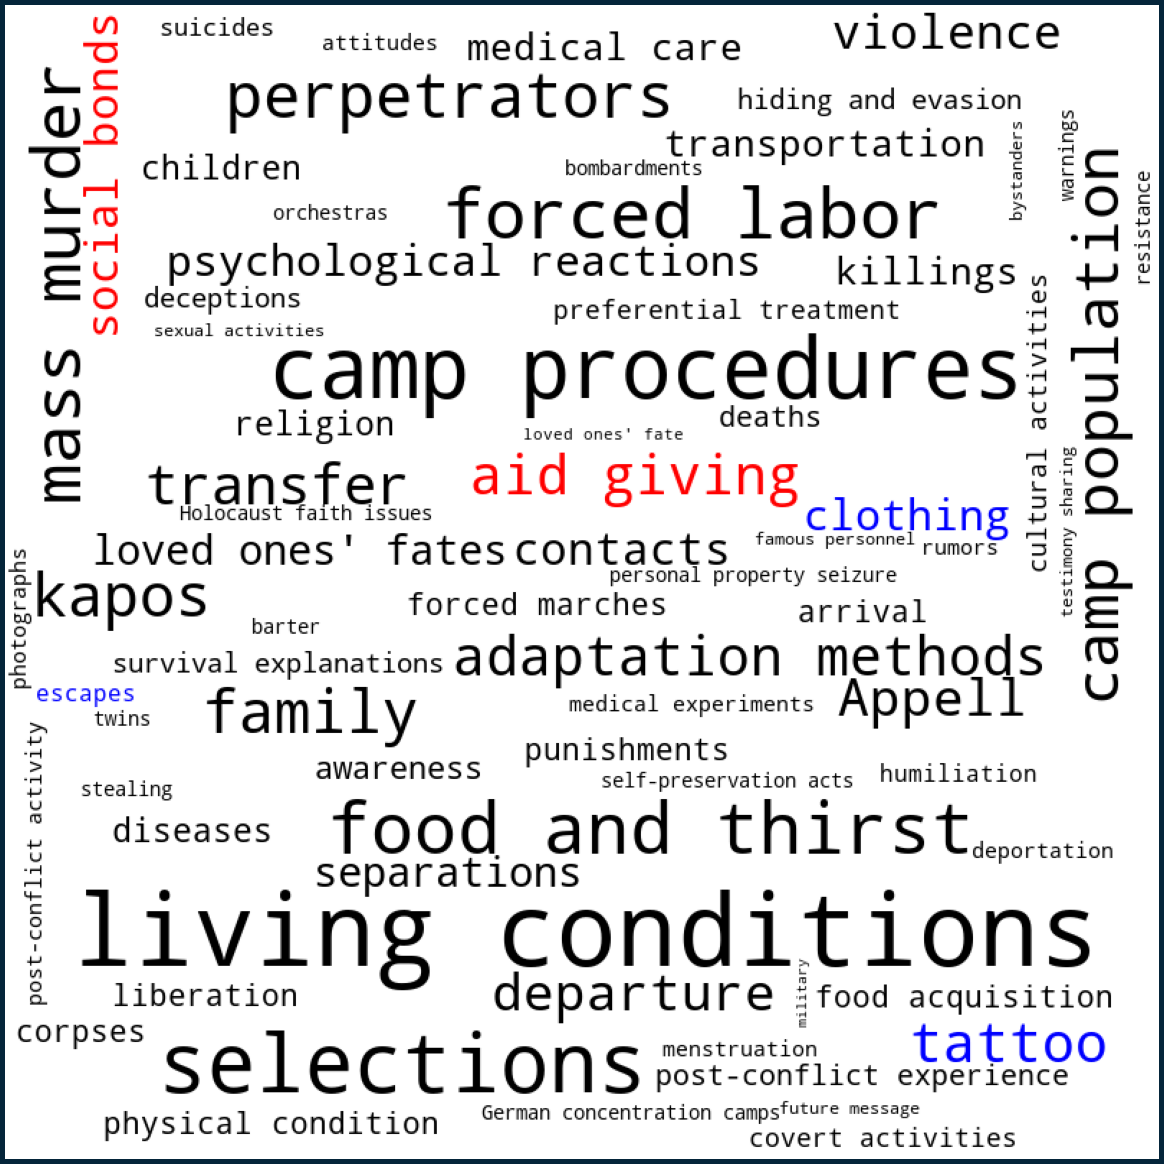

In [55]:
# plot the WordCloud image
fig, ax = plt.subplots(1, 1, figsize=(16, 16), facecolor=None,edgecolor="#04253a",linewidth=10)
ax.imshow(wordcloud)
ax.axis("off")
fig.tight_layout(pad=0.1)
fig.savefig("Figure_1.png",edgecolor=fig.get_edgecolor())